# Loading et Pretraitement

['16 years and over' '16 to 24 years' '16 to 19 years' '20 to 24 years'
 '25 years and over' '25 to 54 years' '25 to 34 years' '35 to 44 years'
 '45 to 54 years' '55 years and over' '55 to 64 years' '65 years and over']


,industry,major_occupation,minor_occupation,year,employ_total,Men_Pourcentages,Women_Pourcentages,White_Pourcentages,BA_Pourcentages,Asian_Pourcentages
0,Agriculture and related,"Management, professional, and related occupations","Management, business, and financial operations...",2020,961000.0,73.569199,26.326743,96.357960,0.624350,0.728408
1,Agriculture and related,"Management, professional, and related occupations",Professional and related occupations,2020,58000.0,62.068966,37.931034,82.758621,8.620690,5.172414
2,Agriculture and related,Service occupations,Protective service occupations,2020,13000.0,84.615385,15.384615,92.307692,0.000000,0.000000
3,Agriculture and related,Service occupations,"Service occupations, except protective",2020,94000.0,55.319149,44.680851,91.489362,4.255319,0.000000
4,Agriculture and related,Sales and office occupations,Sales and related occupations,2020,12000.0,50.000000,50.000000,91.666667,8.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...
6573,Public administration,"Natural resources, construction, and maintenan...","Farming, fishing, and forestry occupations",2015,21000.0,66.666667,33.333333,80.952381,9.523810,4.761905
6574,Public administration,"Natural resources, construction, and maintenan...",Construction and extraction occupations,2015,82000.0,93.902439,7.317073,71.951220,26.829268,1.219512
6575,Public administration,"Natural resources, construction, and maintenan...","Installation, maintenance, and repair occupations",2015,123000.0,94.308943,6.504065,74.796748,14.634146,3.252033
6576,Public administration,"Production, transportation, and material movin...",Production occupations,2015,57000.0,89.473684,10.526316,78.947368,12.280702,5.263158


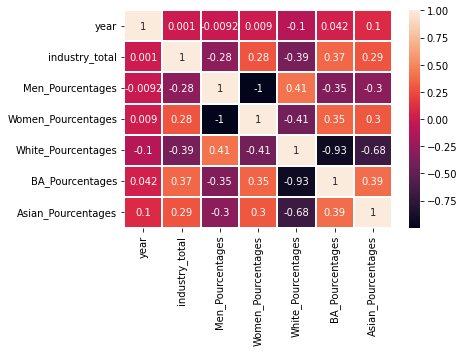

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
earn = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-23/earn.csv");
employee = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-23/employed.csv");

industry = employee.industry.dropna().unique();
industry = np.delete(industry,[19,20,21,22,23,24])
employee.industry = employee.industry.astype("category");
employee.industry = employee.industry.cat.set_categories(industry);

major_occupation = employee.major_occupation.dropna().unique();
employee.major_occupation = employee.major_occupation.astype("category");
employee.major_occupation = employee.major_occupation.cat.set_categories(major_occupation);

minor_occupation = employee.minor_occupation.dropna().unique();
employee.minor_occupation = employee.minor_occupation.astype("category");
employee.minor_occupation = employee.minor_occupation.cat.set_categories(minor_occupation);

race_gender = employee.race_gender.dropna().unique();
employee.race_gender = employee.race_gender.astype("category");
employee.race_gender = employee.race_gender.cat.set_categories(race_gender);

employee=employee.replace('Mining, quarrying, and\r\noil and gas extraction','Mining, quarrying, and oil and gas extraction')
employee=employee.replace('Manage-ment, business, and financial operations occupations','Management, business, and financial operations occupations')

sex = earn.sex.dropna().unique();
sex= np.delete(sex,[0])
earn.sex = earn.sex.astype("category");
earn.sex = earn.sex.cat.set_categories(sex);

race = earn.race.dropna().unique();
earn.race = earn.race.astype("category");
earn.race = earn.race.cat.set_categories(race);

ethnic_origin = earn.ethnic_origin.dropna().unique();
earn.ethnic_origin = earn.ethnic_origin.astype("category");
earn.ethnic_origin = earn.ethnic_origin.cat.set_categories(ethnic_origin);

age = earn.age.dropna().unique();
print(age)
earn.age = earn.age.astype("category");
earn.age = earn.age.cat.set_categories(age);

Total = employee.loc[employee.race_gender== "TOTAL"]
Men = employee.loc[employee.race_gender == "Men"]
Women = employee.loc[employee.race_gender == "Women"]
White = employee.loc[employee.race_gender == "White"]
BlackAmerican = employee.loc[employee.race_gender == "Black or African American"]
Asian = employee.loc[employee.race_gender == "Asian"]

#NewEmployee = pd.concat([Total,Men,Women,White,BlackAmerican,Asian],axis=1)
NewEmployee = pd.merge(Total, Men, on = ['industry','major_occupation','minor_occupation','year'],suffixes = ('_TOTAL', '_Men'),)
NewEmployee = pd.merge(NewEmployee, Women, on = ['industry','major_occupation','minor_occupation','year'],suffixes = ('', '_Women'))
NewEmployee = pd.merge(NewEmployee, White, on = ['industry','major_occupation','minor_occupation','year'],suffixes = ('', '_White'))
NewEmployee = pd.merge(NewEmployee, BlackAmerican, on = ['industry','major_occupation','minor_occupation','year'],suffixes = ('', '_BA'))
NewEmployee = pd.merge(NewEmployee, Asian, on = ['industry','major_occupation','minor_occupation','year'],suffixes = ('', '_Asian'))
NewEmployee = NewEmployee.drop(["race_gender_TOTAL","race_gender_Men","race_gender","race_gender_White","race_gender_BA","race_gender_Asian"], axis=1)
NewEmployee.columns=["industry","major_occupation","minor_occupation","industry_total","employ_n","year","industry_total_Men","employ_n_Men","industry_total_Women","employ_n_Women","industry_total_White","employ_n_White","industry_total_BA","employ_n_BA","industry_total_Asian","employ_n_Asian"]
NewEmployee = NewEmployee[["industry","major_occupation","minor_occupation","year","industry_total","industry_total_Men","industry_total_Women","industry_total_White","industry_total_BA","industry_total_Asian","employ_n","employ_n_Men","employ_n_Women","employ_n_White","employ_n_BA","employ_n_Asian"]]
NewEmployee.employ_n_Men = (NewEmployee.employ_n_Men/NewEmployee.employ_n)*100
NewEmployee.employ_n_Women = (NewEmployee.employ_n_Women/NewEmployee.employ_n)*100
NewEmployee.employ_n_White = (NewEmployee.employ_n_White/NewEmployee.employ_n)*100
NewEmployee.employ_n_BA = (NewEmployee.employ_n_BA/NewEmployee.employ_n)*100
NewEmployee.employ_n_Asian = (NewEmployee.employ_n_Asian/NewEmployee.employ_n)*100
NewEmployee.industry_total_Men = (NewEmployee.industry_total_Men/NewEmployee.industry_total)*100
NewEmployee.industry_total_Women = (NewEmployee.industry_total_Women/NewEmployee.industry_total)*100
NewEmployee.industry_total_White = (NewEmployee.industry_total_White/NewEmployee.industry_total)*100
NewEmployee.industry_total_BA = (NewEmployee.industry_total_BA/NewEmployee.industry_total)*100
NewEmployee.industry_total_Asian = (NewEmployee.industry_total_Asian/NewEmployee.industry_total)*100

Industry = NewEmployee.loc[:,['industry',"year","industry_total","industry_total_Men","industry_total_Women","industry_total_White","industry_total_BA","industry_total_Asian"]]
Industry = Industry.drop_duplicates(subset=['industry',"year"]).sort_values(by=['industry','year'])
Industry.columns=['industry','year','industry_total','Men_Pourcentages','Women_Pourcentages','White_Pourcentages','BA_Pourcentages','Asian_Pourcentages'] 
Industry.drop(Industry[Industry.industry=="Men"].index, inplace=True)


NbEmployee = NewEmployee.loc[:,['industry',"major_occupation","minor_occupation","year","employ_n","employ_n_Men","employ_n_Women","employ_n_White","employ_n_BA","employ_n_Asian"]]
NbEmployee.columns=['industry',"major_occupation","minor_occupation","year","employ_total",'Men_Pourcentages','Women_Pourcentages','White_Pourcentages','BA_Pourcentages','Asian_Pourcentages']

sns.heatmap(Industry.corr(),annot=True,lw=1)
NbEmployee

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs
):
    """
    Utilise `sns.scatterplot` en appliquant d'abord une ACP si besoin
    pour réduire la dimension.
    """

    # Select columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    sp_kwargs = {}
    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        sp_kwargs["hue"] = hue_name
        sp_kwargs["style"] = hue_name
    #if style is not None:
     #   full_data = pd.concat((full_data, style), axis=1)
      #  sp_kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **sp_kwargs)

    return ax, pca

In [3]:
HispanicMen = earn[(earn["ethnic_origin"] == 'Hispanic or Latino')&(earn["sex"] == 'Men')]
for trash_category in ['25 years and over', '16 years and over']:
    HispanicMen = HispanicMen.drop(HispanicMen[HispanicMen.age ==trash_category].index)

HispanicWomen = earn[(earn["ethnic_origin"] == 'Hispanic or Latino')&(earn["sex"] == 'Women')]

for trash_category in ['25 years and over', '16 years and over']:
    HispanicWomen = HispanicWomen.drop(HispanicWomen[HispanicWomen.age ==trash_category].index)

WhiteMen = earn[(earn["race"] == 'White')&(earn["sex"] == 'Men')]

for trash_category in ['25 years and over', '16 years and over']:
    WhiteMen = WhiteMen.drop(WhiteMen[WhiteMen.age ==trash_category].index)

WhiteWomen = earn[(earn["race"] == 'White')&(earn["sex"] == 'Women')]

for trash_category in ['25 years and over', '16 years and over']:
    WhiteWomen = WhiteWomen.drop(WhiteWomen[WhiteWomen.age ==trash_category].index)

BlackMen = earn[(earn["race"] == 'Black or African American')&(earn["sex"] == 'Men')]

for trash_category in ['25 years and over', '16 years and over']:
    BlackMen = BlackMen.drop(BlackMen[BlackMen.age ==trash_category].index)

BlackWomen = earn[(earn["race"] == 'Black or African American')&(earn["sex"] == 'Women')]

for trash_category in ['25 years and over', '16 years and over']:
    BlackWomen = BlackWomen.drop(BlackWomen[BlackWomen.age ==trash_category].index)

AsianMen = earn[(earn["race"] == 'Asian')&(earn["sex"] == 'Men')]

for trash_category in ['25 years and over', '16 years and over']:
    AsianMen = AsianMen.drop(AsianMen[AsianMen.age ==trash_category].index)

AsianWomen = earn[(earn["race"] == 'Asian')&(earn["sex"] == 'Women')]

for trash_category in ['25 years and over', '16 years and over']:
    AsianWomen = AsianWomen.drop(AsianWomen[AsianWomen.age == trash_category].index)
from sklearn.preprocessing import scale



Data = pd.concat([AsianWomen, AsianMen,BlackWomen,BlackMen,WhiteWomen,WhiteMen])

age2 = Data.age.dropna().unique();
Data.age = earn.age.astype("category");
ethnic2 =  Data.ethnic_origin.dropna().unique();
Data.ethnic_origin = earn.ethnic_origin.cat.set_categories(ethnic2);
Data.age = earn.age.cat.set_categories(age2);
race2 =  Data.race.dropna().unique();
Data.race = earn.race.cat.set_categories(race2);


#Data['n_persons']=Data['n_persons']-Data['n_persons'].mean()
#Data['median_weekly_earn']=Data['median_weekly_earn']-Data['median_weekly_earn'].mean()
#Data.ethnic_origin= Data.ethnic_origin.cat.codes
#Data.sex = Data.sex.cat.codes
#Data.race = Data.race.cat.codes
#Data.ethnic_origin = Data.ethnic_origin.cat.codes

Data=Data.groupby(['sex','race','age','year','ethnic_origin'], as_index=False).agg({'n_persons': 'mean','median_weekly_earn': 'mean','quarter': 'mean'})

Test = pd.get_dummies(data=Data[['year','race','n_persons','median_weekly_earn']], drop_first=True)

#Data = Data.sort_values(by=['race','sex','year','age'])
#Data = Data.loc[Data.race!='All Races'].drop(['quarter'],axis=1) 

dataPCA = Test[['n_persons','median_weekly_earn','year']]
dataPCA = dataPCA.fillna(0)
dataPCA_scaled = scale(dataPCA)

#Data.groupby(['race','ethnic_origin'], as_index=False).agg({'n_persons': 'mean','median_weekly_earn': 'mean'})

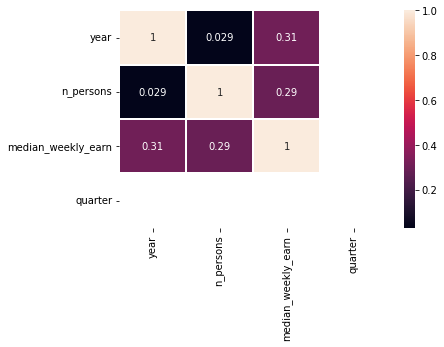

In [4]:
sns.heatmap(Data.corr(),annot=True,lw=1)

##Transformation des variables qualitative

In [5]:

from sklearn.preprocessing import OneHotEncoder
Y = Data['median_weekly_earn'] #variable a explique
X = pd.get_dummies(data=Data[['race','age','sex','n_persons']])
X


,n_persons,race_Asian,race_Black or African American,race_White,age_16 to 24 years,age_25 to 54 years,age_55 years and over,sex_Men,sex_Women
0,143000,1,0,0,1,0,0,1,0
1,149000,1,0,0,1,0,0,1,0
2,204500,1,0,0,1,0,0,1,0
3,216750,1,0,0,1,0,0,1,0
4,204250,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
193,8230750,0,0,1,0,0,1,0,1
194,8462500,0,0,1,0,0,1,0,1
195,8668000,0,0,1,0,0,1,0,1
196,8837000,0,0,1,0,0,1,0,1


# **Regression lineaire**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score
t = Data.sort_values(['year'])
t = t.reset_index()
t= t.drop(["index"],axis=1)
tintermediaire = pd.get_dummies(data=t[['year','race','age','sex','median_weekly_earn']])
t2=tintermediaire.drop(['median_weekly_earn'],axis=1)
X_all = t2[['race_Asian','race_Black or African American','race_White','age_16 to 24 years','age_25 to 54 years','age_55 years and over','sex_Women','sex_Men','year']].to_numpy()
Y_all = tintermediaire['median_weekly_earn'].to_numpy()

tcsv = TimeSeriesSplit(n_splits=10)
moyLinCVT=0
maeLinCVT=0
for train_index, test_index in tcsv.split(t2.year):
  #print("TRAIN:",train_index, "TEST", test_index)
  X_train_CVT,X_test_CVT = X_all[train_index],X_all[test_index]
  Y_train_CVT, Y_test_CVT = Y_all[train_index],Y_all[test_index]

  model2 = LinearRegression(normalize=True)
  model2.fit(X_train_CVT,Y_train_CVT)
  coeff_parameter2 = pd.DataFrame(model2.coef_,t2.columns,columns=['Coefficient'])
  Y_predict_CVT = model2.predict(X_test_CVT)
  #scores=cross_val_score()
  #print(scores)
  maeLinCVT += mean_absolute_error(Y_test_CVT,Y_predict_CVT)
  moyLinCVT+=mean_squared_error(Y_test_CVT,Y_predict_CVT,squared=False)

moyLinCVT = moyLinCVT/10
maeLinCVT = maeLinCVT/10
print(moyLinCVT)
print(maeLinCVT)

92.25496579273297
68.50990226337446


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
 
def evalPolynonmialRegression(degree,X_train,X_test,Y_train,Y_test):
    #entrainement du modèle
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    # Evaluation du training set
 
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    mae=mean_absolute_error(Y_test,y_test_predict)
    r2 = r2_score(Y_test, y_test_predict)

    return model,r2,rmse,mae

In [8]:
moyPolyTotal=0
maePolyTotal=0
for degre in range(1,6):
  moyPoly=0
  maePoly=0
  for train_index, test_index in tcsv.split(t2.year):
    X_train_CVT,X_test_CVT = X_all[train_index],X_all[test_index]
    Y_train_CVT, Y_test_CVT = Y_all[train_index],Y_all[test_index]
    m,r,mse,mae = evalPolynonmialRegression(degre,X_train_CVT,X_test_CVT,Y_train_CVT, Y_test_CVT)
    moyPoly+=mse
    maePoly+=mae
  moyPoly=moyPoly/10
  maePoly=maePoly/10
  maePolyTotal+=maePoly
  moyPolyTotal+=moyPoly
  print(moyPoly)
  print(maePoly)
moyPolyTotal=moyPolyTotal/5
maePolyTotal=maePolyTotal/5
print("moyPolyTotal = ", moyPolyTotal)
print("maePolyTotal = ", maePolyTotal)

88.11139545236884
64.39646568195188
37.73349886643097
29.811013482252303
2837824.450761107
2837817.623886359
133.37445941316543
126.99986840516613
13978074.17473806
13978068.032042041
moyPolyTotal =  3363231.5689705797
maePolyTotal =  3363221.3726551933


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
moyCV = 0
maeCV = 0
for i in range(10):
  X_train_CV, X_test_CV, Y_train_CV, Y_test_CV = train_test_split(X_all, Y_all, test_size=0.4)

  model = LinearRegression()
  model.fit(X_train_CV,Y_train_CV)
  cv = RepeatedKFold(n_splits=10, n_repeats=5)
  cv_score =  cross_val_score(model, X_train_CV, Y_train_CV, cv=cv)
  Y_predict_CV = model.predict(X_test_CV)
  maeCV += mean_absolute_error(Y_test_CV,Y_predict_CV)
  moyCV+=mean_squared_error(Y_test_CV,Y_predict_CV,squared=False)
moyCV = moyCV/10
maeCV = maeCV/10 
print(moyCV)
print(maeCV)

89.87237621611833
70.5908216374637


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
clf = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)
clf.fit(X_train_CV,Y_train_CV)
cv = RepeatedKFold(n_splits=10, n_repeats=5)
cv_score =  cross_val_score(clf, X_train_CV, Y_train_CV, cv=cv)
print("cross_val_score:",cv_score)
print("mean cross_val_score:", sum(cv_score) / len(cv_score))
y_pred = clf.predict(X_test_CV)
score = clf.score(X_test_CV,Y_test_CV) 
# print("score:", score)
r2 = r2_score(Y_test_CV, y_pred)
mse = mean_squared_error(Y_test_CV, y_pred,squared=False)
mae = mean_absolute_error(Y_test_CV, y_pred)
print("r2 score:", r2)
print("mse:", mse)
print("mae:", mae)

cross_val_score: [0.72443866 0.85421111 0.83261174 0.93980206 0.8531718  0.84555412
 0.82048675 0.88622663 0.87524791 0.92878125 0.89079551 0.92833809
 0.95489823 0.87645275 0.82594684 0.83080053 0.88908871 0.81491917
 0.91771523 0.81311895 0.84431509 0.92943691 0.85718304 0.83682519
 0.82926026 0.89817845 0.72615913 0.90085114 0.87000036 0.86981244
 0.91390223 0.89247785 0.84971986 0.79150785 0.80079934 0.80352026
 0.86623281 0.90035159 0.77141283 0.84813638 0.80408686 0.82244594
 0.91238745 0.86000017 0.86408874 0.92465118 0.8573688  0.79755251
 0.93937234 0.50272713]
mean cross_val_score: 0.8517474030972094
r2 score: 0.833023309867202
mse: 88.94460178954088
mae: 74.3625


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


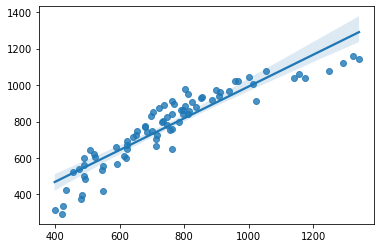

In [11]:
sns.regplot(Y_test_CV,Y_predict_CV)

# **Regression k plus proche voisin**

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
moykpp=0
maekpp=0
param_grid = {'n_neighbors':np.arange(1,15)}
for train_index, test_index in tcsv.split(t2.year):
  #print("TRAIN:",train_index, "TEST", test_index)
  X_train_CVT_kpp,X_test_CVT_kpp = X_all[train_index],X_all[test_index]
  Y_train_CVT_kpp, Y_test_CVT_kpp = Y_all[train_index],Y_all[test_index]
  bestValueKppSq = 1000000000
  bestValueKppAbs = 0
  for nbNeighbors in range(1,19):
    knr = KNeighborsRegressor(n_neighbors=nbNeighbors)
    knr.fit(X_train_CVT_kpp, Y_train_CVT_kpp)
    Y_predict_CVT_kpp = knr.predict(X_test_CVT_kpp)
    if (bestValueKppSq > mean_squared_error(Y_test_CVT_kpp,Y_predict_CVT_kpp,squared=False)):
      bestValueKppSq = mean_squared_error(Y_test_CVT_kpp,Y_predict_CVT_kpp,squared=False)
      bestValueKppAbs = mean_absolute_error(Y_test_CVT_kpp,Y_predict_CVT_kpp)
  moykpp += bestValueKppSq
  maekpp += bestValueKppAbs
moykpp = moykpp/10
maekpp = maekpp/10
print(moykpp)
print(maekpp)

39.26242451869409
31.72222222222222


# **Random Forest**

In [13]:
print(tintermediaire)
for i in range(2010,2020):
  
  print(tintermediaire.median_weekly_earn[(tintermediaire.year==i)&(tintermediaire.race_White==1)&(tintermediaire.sex_Women==1)&(tintermediaire['age_25 to 54 years']==1)])

     year  median_weekly_earn  ...  sex_Men  sex_Women
0    2010              486.00  ...        1          0
1    2010              655.75  ...        1          0
2    2010              455.75  ...        1          0
3    2010              878.00  ...        1          0
4    2010              402.50  ...        1          0
..    ...                 ...  ...      ...        ...
193  2020             1323.50  ...        1          0
194  2020             1527.50  ...        1          0
195  2020              729.50  ...        1          0
196  2020              590.75  ...        0          1
197  2020              962.75  ...        0          1

[198 rows x 10 columns]
16    714.5
Name: median_weekly_earn, dtype: float64
22    730.0
Name: median_weekly_earn, dtype: float64
38    735.0
Name: median_weekly_earn, dtype: float64
58    746.75
Name: median_weekly_earn, dtype: float64
84    762.75
Name: median_weekly_earn, dtype: float64
107    773.25
Name: median_weekly_earn, dtype: f

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':np.arange(1,201,5), 
              #'max_leaf_nodes' : np.arange(10,75) }
              'max_depth':np.arange(1,20), 
              'max_features':np.arange(2,10)
              }
maeArbre=0
moyArbre=0
Y0test=[]
Y0predict=[]
for train_index, test_index in tcsv.split(t2.year):
  #print("TRAIN:",train_index, "TEST", test_index)
  X_train_CVT_arbre,X_test_CVT_arbre = X_all[train_index],X_all[test_index]
  Y_train_CVT_arbre, Y_test_CVT_arbre = Y_all[train_index],Y_all[test_index]
       
  # D'abord, chercher une bonne valeur pour le paramètre 'n_estimators' (nombre d'arbres)
  bestValueRFSq=5000000
  bestValueRFAbs = 0
  Y0test.append(Y_train_CVT_arbre[-1])

  for nbEstimator in range(1,100):
    rfr = RandomForestRegressor(n_estimators=nbEstimator)
    rfr.fit(X_train_CVT_arbre, Y_train_CVT_arbre)
    #print(rfr.get_params(deep=True))
    Y_predict_CVT_arbre = rfr.predict(X_test_CVT_arbre)

    if(bestValueRFSq > mean_squared_error(Y_test_CVT_arbre,Y_predict_CVT_arbre,squared=False)):
      bestValueRFSq = mean_squared_error(Y_test_CVT_arbre,Y_predict_CVT_arbre,squared=False)
      bestValueRFAbs = mean_absolute_error(Y_test_CVT_arbre,Y_predict_CVT_arbre)
      Y_predicts=Y_predict_CVT_arbre
  Y0predict.append(Y_predicts[-1])
  moyArbre += bestValueRFSq
  maeArbre += bestValueRFAbs


  
moyArbre = moyArbre/10
maeArbre=maeArbre/10
print(moyArbre)
print(maeArbre)

39.13442403313299
31.090852973596846


In [15]:
  print(Y0test)
  print(Y0predict)

[427.5, 388.5, 957.0, 954.75, 409.25, 773.25, 1227.25, 828.5, 480.0, 485.0]
[420.60625, 906.8333333333334, 983.6458333333334, 394.42, 765.6029411764706, 1179.861111111111, 848.75, 455.5, 477.83125, 888.3125]


# Features les plus importantes

In [16]:
list(rfr.feature_importances_)

[0.024112066513424325,
 0.15310883219027638,
 0.009911479188132283,
 0.5680304827273447,
 0.012393469367120448,
 0.012600736941916064,
 0.05670172818943999,
 0.06956631695218857,
 0.09357488793015718]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


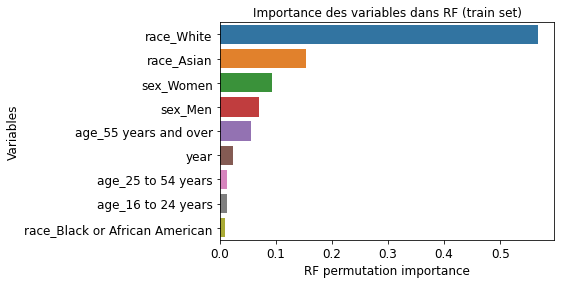

,Variables,RF permutation Importance (test set)
0,race_White,0.568030
1,race_Asian,0.153109
2,sex_Women,0.093575
3,sex_Men,0.069566
4,age_55 years and over,0.056702
5,year,0.024112
6,age_25 to 54 years,0.012601
7,age_16 to 24 years,0.012393
8,race_Black or African American,0.009911


In [17]:
sorted_importances, sorted_columns = zip(*sorted(zip(rfr.feature_importances_, t2.columns), reverse=True))
df_importance_rf = pd.DataFrame({'Variables': sorted_columns, 'RF permutation Importance (test set)': sorted_importances})

sns.barplot('RF permutation Importance (test set)', 'Variables', data = df_importance_rf, orient='h')
plt.title('Importance des variables dans RF (train set)')
plt.xticks(fontsize='large')
plt.xlabel('RF permutation importance',fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel('Variables',fontsize='large')
plt.show()
df_importance_rf

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


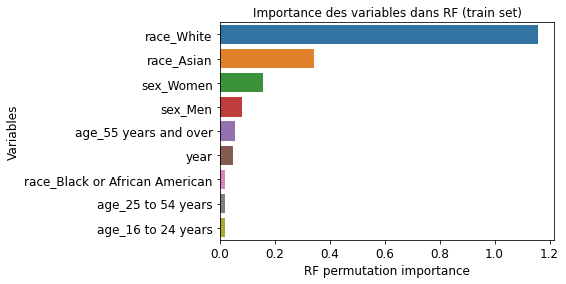

(180, 9)
(180,)


In [18]:
# Calculate permutation importance for KNN Regression

from sklearn.inspection import permutation_importance
results = permutation_importance(rfr, X_train_CVT_arbre, Y_train_CVT_arbre, scoring='r2')
importance = results.importances_mean
sorted_importances, sorted_columns = zip(*sorted(zip(importance, t2.columns), reverse=True))
df_importance_rf = pd.DataFrame({'Variables': sorted_columns, 'RF permutation Importance (train set)': sorted_importances})

sns.barplot('RF permutation Importance (train set)', 'Variables', data = df_importance_rf, orient='h')
plt.title('Importance des variables dans RF (train set)')
plt.xticks(fontsize='large')
plt.xlabel('RF permutation importance',fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel('Variables',fontsize='large')
plt.show()
df_importance_rf
print(X_train_CVT_arbre.shape)
print(Y_train_CVT_arbre.shape)

In [19]:
moyPoly=0
maePoly=0
for train_index, test_index in tcsv.split(t2.year):
  X_train_CVT,X_test_CVT = X_all[train_index],X_all[test_index]
  Y_train_CVT, Y_test_CVT = Y_all[train_index],Y_all[test_index]
  m,r,mse,mae = evalPolynonmialRegression(2,X_train_CVT,X_test_CVT,Y_train_CVT, Y_test_CVT)
  moyPoly+=mse
  maePoly+=mae
moyPoly=moyPoly/10
maePoly=maePoly/10
print(moyPoly)
print(maePoly)
print(X_train_CVT.shape)
print(Y_train_CVT.shape)

37.73349886643097
29.811013482252303
(180, 9)
(180,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


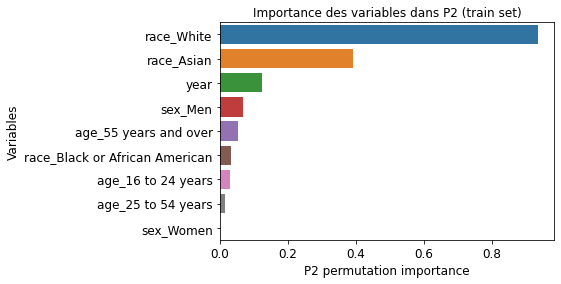

(180, 9)
(180,)


In [20]:
# Calculate permutation importance for P2

from sklearn.inspection import permutation_importance
results = permutation_importance(rfr, X_test_CVT_arbre, Y_test_CVT_arbre, scoring='r2')
importance = results.importances_mean
sorted_importances, sorted_columns = zip(*sorted(zip(importance, t2.columns), reverse=True))
df_importance_rf = pd.DataFrame({'Variables': sorted_columns, 'P2 permutation Importance (train set)': sorted_importances})

sns.barplot('P2 permutation Importance (train set)', 'Variables', data = df_importance_rf, orient='h')
plt.title('Importance des variables dans P2 (train set)')
plt.xticks(fontsize='large')
plt.xlabel('P2 permutation importance',fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel('Variables',fontsize='large')
plt.show()
df_importance_rf
print(X_train_CVT_arbre.shape)
print(Y_train_CVT_arbre.shape)

#  Methode d'analyse de Série Temporelle
SARIMA

In [21]:
!pip3 install --user scipy==1.2.0

  Using cached scipy-1.2.0-cp37-cp37m-manylinux1_x86_64.whl (26.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.0
    Uninstalling scipy-1.4.0:
      Successfully uninstalled scipy-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.0 requires scipy>=1.3, but you have scipy 1.2.0 which is incompatible.
pmdarima 1.8.3 requires scipy>=1.3.2, but you have scipy 1.2.0 which is incompatible.
jax 0.2.21 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [22]:
!pip install pmdarima

  Using cached scipy-1.7.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.2.0
    Uninstalling scipy-1.2.0:
      Successfully uninstalled scipy-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [28]:
!sudo apt-get install scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package scipy


In [24]:
!pip install python-scipy

ERROR: Could not find a version that satisfies the requirement python-scipy (from versions: none)
ERROR: No matching distribution found for python-scipy


In [25]:

!sudo apt-get install scipy.fftpack

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package scipy.fftpack
E: Couldn't find any package by glob 'scipy.fftpack'
E: Couldn't find any package by regex 'scipy.fftpack'


In [29]:
import numpy as np
import scipy
from sklearn.model_selection import TimeSeriesSplit
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error


from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm


register_matplotlib_converters()
warnings.filterwarnings("ignore")
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    print(rolling_mean)
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


ModuleNotFoundError: ignored

      sex   race             age  median_weekly_earn  time
2024  Men  White  25 to 54 years                 893     0
2025  Men  White  25 to 54 years                 869     1
2026  Men  White  25 to 54 years                 871     2
2027  Men  White  25 to 54 years                 879     3
2028  Men  White  25 to 54 years                 876     4
(44, 5)
Index(['sex', 'race', 'age', 'median_weekly_earn', 'time'], dtype='object')


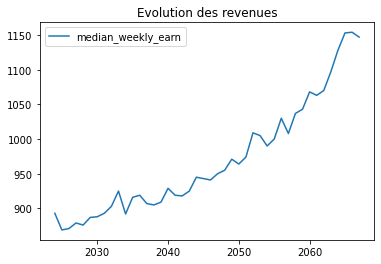

In [30]:
MergeTable = pd.concat([WhiteMen, WhiteWomen, BlackMen, BlackWomen,AsianMen,AsianWomen], axis=0)

MergeTable['time']= (MergeTable['year']-2010)*4+MergeTable['quarter']-1
MergeTable = MergeTable.drop("ethnic_origin", axis = 'columns')
MergeTable = MergeTable.drop("year", axis = 'columns')
MergeTable = MergeTable.drop("quarter", axis = 'columns')
MergeTable = MergeTable.drop("n_persons", axis = 'columns')


df = MergeTable[(MergeTable["race"] == 'White')&(MergeTable["sex"] == 'Men')&(MergeTable["age"] == '25 to 54 years')]# not working because ethnical data doesn't respect the same age categories

print(df.head())
print(df.shape)
print(df.columns)
df[['median_weekly_earn']].plot()
plt.title("Evolution des revenues")
plt.show()

In [31]:
df1 = df[['time', 'median_weekly_earn']]
df1=df1.set_index('time')
#get_stationarity(df1['median_weekly_earn']) # not stationnary donc besoin de le rendre sttionaire diff 2
plt.show()
from random import randrange
from pandas import Series
from matplotlib import pyplot
#from statsmodels.tsa.seasonal import seasonal_decompose
print(df1['median_weekly_earn'])

pyplot.show()

time
0      893
1      869
2      871
3      879
4      876
5      887
6      888
7      893
8      903
9      925
10     892
11     916
12     919
13     907
14     905
15     909
16     929
17     919
18     918
19     925
20     945
21     943
22     941
23     950
24     955
25     971
26     964
27     974
28    1009
29    1005
30     990
31    1000
32    1030
33    1008
34    1037
35    1043
36    1068
37    1063
38    1070
39    1097
40    1128
41    1153
42    1154
43    1147
Name: median_weekly_earn, dtype: int64


NameError: ignored

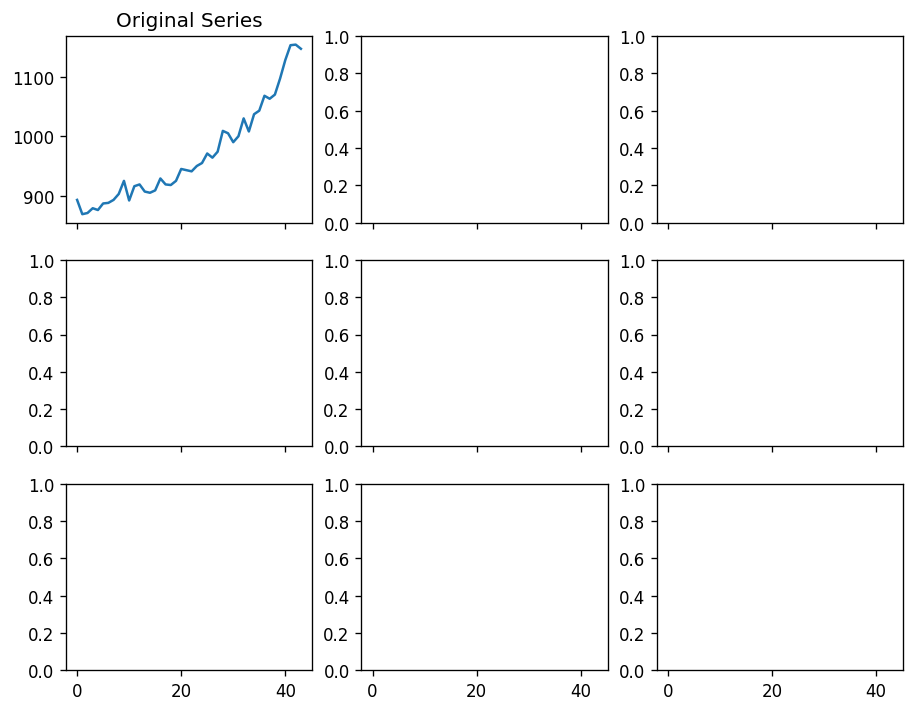

In [33]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#print(df1)
# Original Series
fig, axes = plt.subplots(3, 3, sharex=True)
axes[0, 0].plot(df1.median_weekly_earn); axes[0, 0].set_title('Original Series')
plot_acf(df1.median_weekly_earn, ax=axes[0, 1])
plot_pacf(df1.median_weekly_earn, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df1.median_weekly_earn.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.median_weekly_earn.diff().dropna(), ax=axes[1, 1])
plot_pacf(df1.median_weekly_earn.diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df1.median_weekly_earn.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.median_weekly_earn.diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(df1.median_weekly_earn.diff().diff().dropna(), ax=axes[2,2])

plt.show()

In [34]:


print(df1[:-int(len(df1)/2)])
stepwise_fit = pm.auto_arima(df1[:-int(len(df1)/2)], start_p=0, start_q=0, max_p=4, max_q=4,
                             m=4, #seasonalityPeriod
                             start_P=0, 
                             seasonal=True, d=2 #differenciation
                             , trace=True,
                             error_action='ignore',
                             stepwise=True)  # set to stepwise 

stepwise_fit.summary()
my_order = (1, 2,1)  #(p,d,q)
my_seasonal_order = (1, 0, 1, 4) #(p,d,q,t) t= frenquence de la saisonalité

      median_weekly_earn
time                    
0                    893
1                    869
2                    871
3                    879
4                    876
5                    887
6                    888
7                    893
8                    903
9                    925
10                   892
11                   916
12                   919
13                   907
14                   905
15                   909
16                   929
17                   919
18                   918
19                   925
20                   945
21                   943


NameError: ignored

In [ ]:
n_periods = 6
print(df1)
train=df1[:-n_periods]
test=df1[-n_periods:]
my_order=(1,2,1)
my_seasonal_order=(1,0,1,4)
# Build Model
model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order) 
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
results= fitted.forecast(n_periods, alpha=0.05)  # 95% conf
print(results)
# Make as pandas series


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(results, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("Median Weekly Earning")
plt.xlabel("Quarter")
plt.show()



In [ ]:
taberror=[]
tababserror=[]
"""
p: Trend autoregression order.
d: Trend difference order.  différenciation du 1er ordre nécessaire
q: Trend moving average order.

p = number of significant terms in PACF for trend

d = Order of differencing for trend

q= number of significant terms in ACF for trend

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/#:~:text=ARIMA%2C%20short%20for%20'AutoRegressive%20Integrated,to%20predict%20the%20future%20values.
"""
my_order=(2,1,0)
my_seasonal_order=(0,0,0,4)
# define model 5*seasonalité pour estimation
tscv=TimeSeriesSplit(max_train_size=None, n_splits=10)
tabpredictions=[]

for train_index, test_index in tscv.split(df1):
  if(test_index[0]<int(len(df1)/2)):
    continue
  try:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_index,test_index
    y_train, y_test = df1['median_weekly_earn'].iloc[train_index],df1['median_weekly_earn'].iloc[test_index]
    #print(y_train)
    model = SARIMAX(y_train, order=my_order, seasonal_order=my_seasonal_order)
    res = model.fit(disp=0)
  except:
    continue
    print("Unexpected error:")
  
  #print(res.summary())
  step=len(y_test)

  predictions = res.forecast(steps=step)
  #print("test")
  tabpredictions.extend(predictions)

  try:
    error = mean_squared_error(y_test, predictions,squared=False)
    abserror = mean_absolute_error(y_test, predictions)
    taberror.append(error)
    tababserror.append(abserror)

  except:
    continue
  print('Testing Mean Squared Error: %.3f' % error)
  plt.show()

predictions = res.forecast(steps=step)
tabpredictions.extend(predictions)
print(sum(taberror)/len(taberror))
print(sum(tababserror)/len(tababserror))
print(len(df1.median_weekly_earn)-len(tabpredictions)+4)
plt.plot(range(24,len(df1.median_weekly_earn)+4),tabpredictions)
plt.plot(df[['time']],df[['median_weekly_earn']])
plt.ylabel("Median Weekly Earning")
plt.xlabel("Quarter")
plt.legend(["Prediction data","Train data"])


## **Analyse exploratoire des minorités**

1. Analyse selon les industries

In [ ]:
plt.style.use('default')
fig, ax =plt.subplots(figsize=(20, 5))
IndustryMelt=Industry.melt(id_vars=["industry","year","industry_total"],value_vars=["White_Pourcentages","Asian_Pourcentages","BA_Pourcentages"],var_name="Race_gender",value_name="Pourcentage")
sns.barplot(x="industry",y="Pourcentage",hue="Race_gender",data=IndustryMelt)

plt.xticks(
    rotation=55, 
    horizontalalignment='right',
    fontweight='black',
    fontsize=15 
)
plt.yticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='black',
    fontsize=15
)
plt.ylabel('Pourcentage moyen d\'employee',fontsize=20) 
plt.xlabel('Industry',fontsize=20)

plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.show()

In [ ]:
IndustryMeltGrid = IndustryMelt.loc[IndustryMelt.Race_gender!='White_Pourcentages']
g = sns.FacetGrid(IndustryMeltGrid, col="industry", col_wrap=5, height=5, ylim=(0, 20),margin_titles=True)
g.map(sns.barplot,"year","Pourcentage","Race_gender",palette="Set1").add_legend()

In [ ]:
IndustryMeltGrid2 = IndustryMelt.loc[IndustryMelt.Race_gender!='White_Pourcentages']
fig, axes = plt.subplots(6,1,figsize=(20, 15))
Year2015 = IndustryMeltGrid2.loc[IndustryMelt.year==2015]
Year2016 = IndustryMeltGrid2.loc[IndustryMelt.year==2016]
Year2017 = IndustryMeltGrid2.loc[IndustryMelt.year==2017]
Year2018 = IndustryMeltGrid2.loc[IndustryMelt.year==2018]
Year2019 = IndustryMeltGrid2.loc[IndustryMelt.year==2019]
Year2020 = IndustryMeltGrid2.loc[IndustryMelt.year==2020]
sns.barplot(ax=axes[0],x="industry",y="Pourcentage",hue="Race_gender",data=Year2015,ci=None).get_legend().remove()
sns.barplot(ax=axes[1],x="industry",y="Pourcentage",hue="Race_gender",data=Year2016,ci=None).get_legend().remove()
sns.barplot(ax=axes[2],x="industry",y="Pourcentage",hue="Race_gender",data=Year2017,ci=None).get_legend().remove()
sns.barplot(ax=axes[3],x="industry",y="Pourcentage",hue="Race_gender",data=Year2018,ci=None).get_legend().remove()
sns.barplot(ax=axes[4],x="industry",y="Pourcentage",hue="Race_gender",data=Year2019,ci=None).get_legend().remove()
sns.barplot(ax=axes[5],x="industry",y="Pourcentage",hue="Race_gender",data=Year2020,ci=None).get_legend().remove()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
axes[0].xaxis.set_ticklabels('')
axes[0].set_xlabel('')
axes[0].set_ylabel('pourcentage 2015')
axes[1].xaxis.set_ticklabels('')
axes[1].set_xlabel('')
axes[1].set_ylabel('pourcentage 2016')
axes[2].xaxis.set_ticklabels('')
axes[2].set_xlabel('')
axes[2].set_ylabel('pourcentage 2017')
axes[3].xaxis.set_ticklabels('')
axes[3].set_xlabel('')
axes[3].set_ylabel('pourcentage 2018')
axes[4].xaxis.set_ticklabels('')
axes[4].set_xlabel('')
axes[4].set_ylabel('pourcentage 2019')
axes[5].set_ylabel('pourcentage 2020')

plt.legend(bbox_to_anchor=(0.13, 1), loc=0, borderaxespad=0.)
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20, 10))

IndustryMeltBlack = Industry.loc[:,["industry",'industry_total','year','White_Pourcentages','BA_Pourcentages','Asian_Pourcentages']]
IndustryMeltBlack["White_Pourcentages"]=IndustryMeltBlack["White_Pourcentages"]*IndustryMeltBlack["industry_total"]/100
IndustryMeltBlack["BA_Pourcentages"]=IndustryMeltBlack["BA_Pourcentages"]*IndustryMeltBlack["industry_total"]/100
IndustryMeltBlack["Asian_Pourcentages"]=IndustryMeltBlack["Asian_Pourcentages"]*IndustryMeltBlack["industry_total"]/100
IndustryMeltBlack=IndustryMeltBlack.groupby(['industry'], as_index=False).agg({'industry_total': 'mean','White_Pourcentages': 'mean','BA_Pourcentages': 'mean','Asian_Pourcentages': 'mean' })
IndustryMeltBlack["%_White"]=IndustryMeltBlack["White_Pourcentages"]/IndustryMeltBlack["industry_total"]*100
IndustryMeltBlack["%_BA"]=IndustryMeltBlack["BA_Pourcentages"]/IndustryMeltBlack["industry_total"]*100
IndustryMeltBlack["%_Asian"]=IndustryMeltBlack["Asian_Pourcentages"]/IndustryMeltBlack["industry_total"]*100
IndustryMeltBlack = IndustryMeltBlack.drop(['White_Pourcentages','BA_Pourcentages','Asian_Pourcentages'],axis=1)

Black= IndustryMeltBlack.sort_values(['%_BA']).reset_index(drop=True)
sns.barplot(ax=axes[1],x="industry",y="%_BA",data=IndustryMeltBlack,ci=None)
sns.barplot(ax=axes[0],x="industry",y="%_Asian",data=IndustryMeltBlack,ci=None)
axes[0].tick_params(labelrotation=45)
axes[0].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')
axes[1].tick_params(labelrotation=45)
axes[1].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')

plt.show()


2. Analyse selon les minor occupations

In [ ]:
plt.subplots(figsize=(20, 5))
Minor = NewEmployee.loc[:,["minor_occupation",'employ_n','year','employ_n_White','employ_n_BA','employ_n_Asian']]
MinorMelt=Minor.melt(id_vars=["minor_occupation","year","employ_n"],value_vars=["employ_n_White","employ_n_BA","employ_n_Asian"],var_name="ethnie",value_name="Pourcentage")
sns.barplot(x="minor_occupation",y="Pourcentage",hue="ethnie",data=MinorMelt)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.show()
NewEmployee

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20, 10))

Minor = NewEmployee.loc[:,["minor_occupation",'employ_n','year','employ_n_White','employ_n_BA','employ_n_Asian']]
#MinorMelt = MinorMelt.loc[MinorMelt.ethnie != 'employ_%_White']
#
Minor = Minor.groupby(['minor_occupation'], as_index=False).agg({'employ_n': 'mean','employ_n_BA': 'mean','employ_n_Asian': 'mean','employ_n_White': 'mean',})
Minor = Minor.drop(['employ_n','employ_n_White'],axis=1)

sns.barplot(ax=axes[1],x="minor_occupation",y="employ_n_BA",data=Minor,ci=None)
sns.barplot(ax=axes[0],x="minor_occupation",y="employ_n_Asian",data=Minor,ci=None)
axes[0].tick_params(labelrotation=45)
axes[0].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')
axes[1].tick_params(labelrotation=45)
axes[1].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')

plt.show()


3. analyse selon les majors occupations

In [ ]:
NewEmployeeMajor = NewEmployee.loc[:,["major_occupation",'employ_n','year','employ_n_White','employ_n_BA','employ_n_Asian']]
NewEmployeeMajor["employ_nb_White"]=NewEmployeeMajor["employ_n"]*NewEmployeeMajor["employ_n_White"]/100
NewEmployeeMajor["employ_nb_BA"]=NewEmployeeMajor["employ_n"]*NewEmployeeMajor["employ_n_BA"]/100
NewEmployeeMajor["employ_nb_Asian"]=NewEmployeeMajor["employ_n"]*NewEmployeeMajor["employ_n_Asian"]/100
#NewEmployeeMajor=NewEmployeeMajor.groupby(['minor_occupation', 'year'], as_index=False)['employ_n'].sum()
NewEmployeeMajor=NewEmployeeMajor.groupby(['major_occupation', 'year'], as_index=False).agg({'employ_n': 'sum','employ_nb_White': 'sum','employ_nb_BA': 'sum','employ_nb_Asian': 'sum' })
NewEmployeeMajor["employ_%_White"]=NewEmployeeMajor["employ_nb_White"]/NewEmployeeMajor["employ_n"]*100
NewEmployeeMajor["employ_%_BA"]=NewEmployeeMajor["employ_nb_BA"]/NewEmployeeMajor["employ_n"]*100
NewEmployeeMajor["employ_%_Asian"]=NewEmployeeMajor["employ_nb_Asian"]/NewEmployeeMajor["employ_n"]*100
plt.subplots(figsize=(20, 5))
Major = NewEmployeeMajor.loc[:,["major_occupation",'employ_n','year','employ_%_White','employ_%_BA','employ_%_Asian']]
MajorMelt=Major.melt(id_vars=["major_occupation","year","employ_n"],value_vars=["employ_%_White","employ_%_BA","employ_%_Asian"],var_name="ethnie",value_name="Pourcentage")
sns.barplot(x="major_occupation",y="Pourcentage",hue="ethnie",data=MajorMelt)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.show()

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20, 5))

Major2 = Major.groupby(['major_occupation'], as_index=False).agg({'employ_n': 'mean','employ_%_BA': 'mean','employ_%_Asian': 'mean','employ_%_White': 'mean',})


sns.barplot(ax=axes[1],x="major_occupation",y="employ_%_BA",data=Major2,ci=None)
sns.barplot(ax=axes[0],x="major_occupation",y="employ_%_Asian",data=Major2,ci=None)
sns.barplot(ax=axes[2],x="major_occupation",y="employ_%_White",data=Major2,ci=None)
axes[0].tick_params(labelrotation=45)
axes[0].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')
axes[1].tick_params(labelrotation=45)
axes[1].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')
axes[2].tick_params(labelrotation=45)
axes[2].set_xticklabels(labels=axes[0].get_xticklabels(),horizontalalignment='right')
plt.show()
Major2

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.subplots(figsize=(20, 5))
sns.barplot(x="major_occupation",y="employ_n",ci=None,data=Major2)
fig = plt.figure(1, figsize=(5, 3))
plt.xticks(
    rotation=55, 
    horizontalalignment='right',
    fontweight='black',
    fontsize=15 
)
plt.yticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='black',
    fontsize=15
)
plt.ylabel('Nombre d\'employee',fontsize=20) 
plt.xlabel('Major occupation',fontsize=20)
plt.show()